In [1]:
import pandas as pd
import itertools
from collections import Counter

In [2]:
df = pd.read_csv('./input/preprocesse_samples_from_last_10000.csv',sep=',',quotechar='|',header=None,encoding='utf-8')
df.columns = ['title','body','tags']

In [3]:
df.head(3)

,title,body,tags
0,How is viewport size typically passed as an ar...,I'm looking at the docs for a command line too...,<html><web><command-line>
1,mysqli_query insert success and throws error,This issue has baffled me. I have a simple mys...,<php><mysqli>
2,Android Studio - Resources Menu,I am new to android Studio. I have placed a te...,<android-studio><android-resources>


In [4]:
%matplotlib inline
# pandas for data manipulation
import pandas as pd
pd.options.mode.chained_assignment = None
# nltk for nlp
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
# list of stopwords like articles, preposition
stop = set(stopwords.words('english'))
from string import punctuation
from collections import Counter
import re
import numpy as np

In [5]:
que_words=[len(q) for q in df.body]
print min(que_words),max(que_words)

6 21449


### Tokenize

In [6]:
def tokenizer(text):
    try:
        tokens_ = [word_tokenize(sent) for sent in sent_tokenize(text)]
        
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent

        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        tokens = list(filter(lambda t: t not in punctuation, tokens))
        tokens = list(filter(lambda t: t not in [u"'s", u"n't", u"...", u"''", u'``', 
                                            u'\u2014', u'\u2026', u'\u2013'], tokens))
        filtered_tokens = []
        for token in tokens:
            if re.search('[a-zA-Z]', token):
                filtered_tokens.append(token)

        filtered_tokens = list(map(lambda token: token.lower(), filtered_tokens))

        return filtered_tokens
    except Exception as e:
        print(e)

In [7]:
tokens1 = df['body'].map(tokenizer)
tokens2 = df['title'].map(tokenizer)
df['tokens']=tokens1+tokens2

### Stem

In [8]:
from nltk.stem.porter import PorterStemmer

In [9]:
def stem_token(df):
    porter_stemmer = PorterStemmer()
    tokens_list=[]
    for tokens in df:
        tokens_list.append(map(porter_stemmer.stem,tokens))
    return tokens_list

In [ ]:
df['tokens'] = stem_token(df['tokens'])

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

# min_df is minimum number of documents that contain a term t
# max_features is maximum number of unique tokens (across documents) that we'd consider
# TfidfVectorizer preprocesses the descriptions using the tokenizer we defined above

vectorizer = TfidfVectorizer(min_df=10, max_features=10000, tokenizer=tokenizer, ngram_range=(1, 2))
vz = vectorizer.fit_transform(list(df['body']))

In [73]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

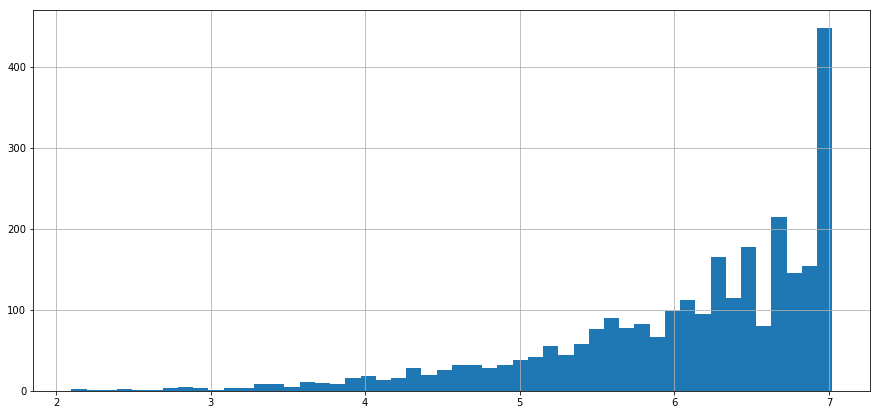

In [74]:
tfidf.tfidf.hist(bins=50, figsize=(15,7))

In [75]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(30)

,tfidf
using,2.099495
code,2.161652
like,2.283672
want,2.303778
get,2.455224
'm,2.462814
use,2.570294
trying,2.674123
would,2.741018
error,2.770375


In [76]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(30)

,tfidf
one thing,7.021465
developers,7.021465
stage,7.021465
pool,7.021465
/button,7.021465
lt button,7.021465
want test,7.021465
working project,7.021465
moves,7.021465
pipeline,7.021465
